In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [2]:
# importing dataset
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# analyzing dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# column names for quick reference
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# dropping unnecessary id column
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# checking for null values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# drop one null value from credit limit
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

# impute minimum payment null values with median values
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

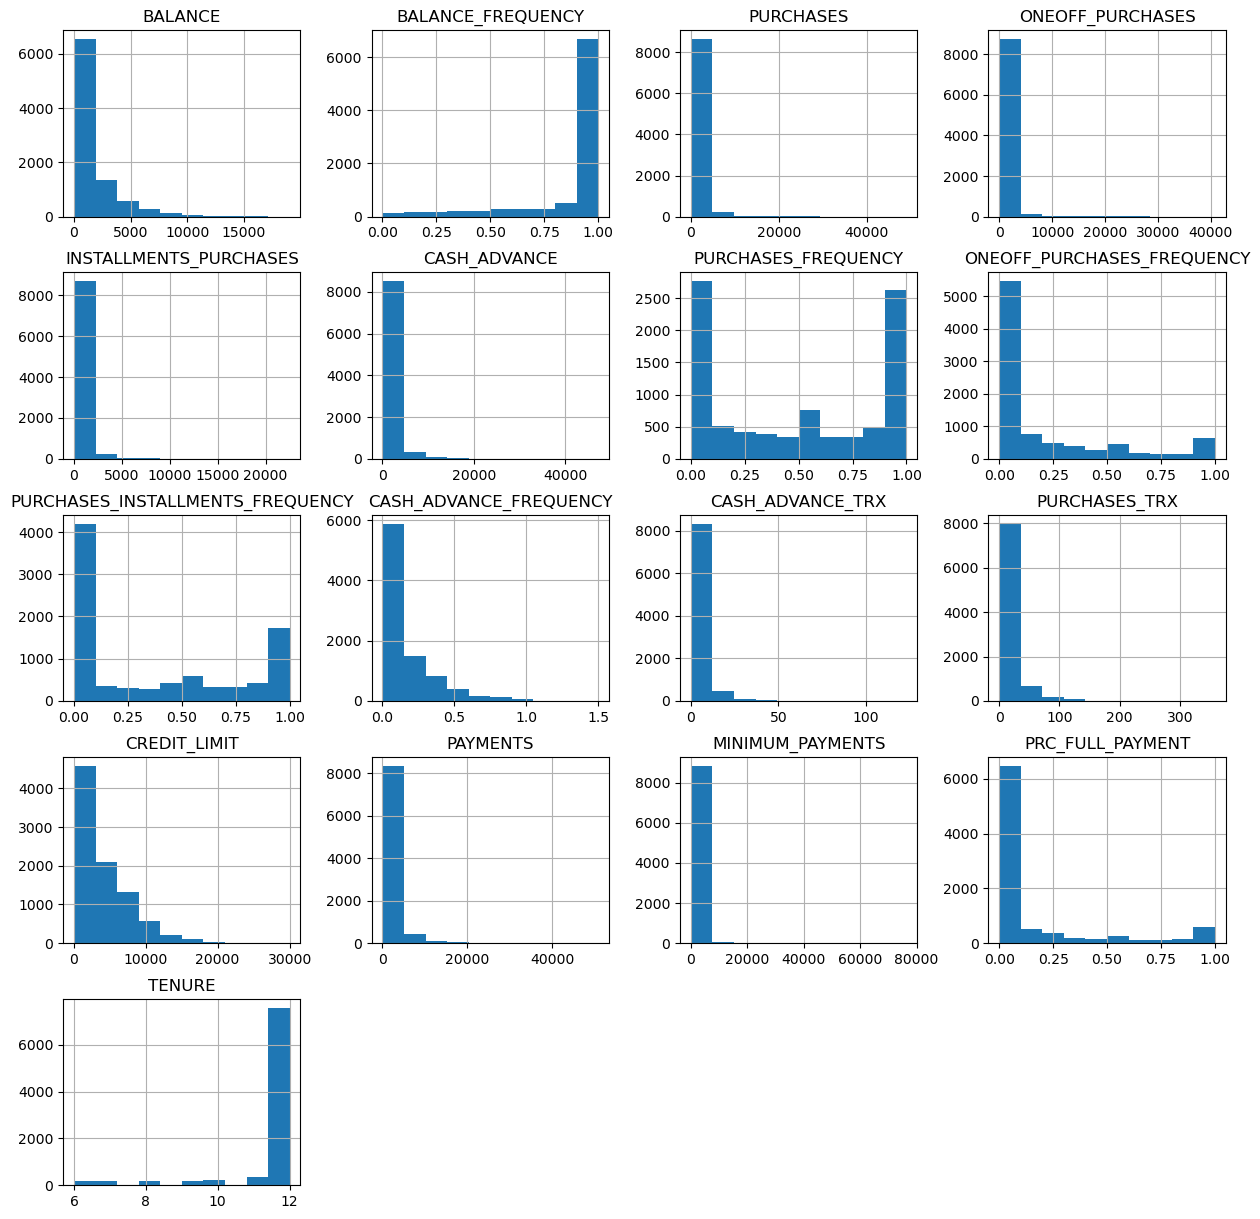

In [8]:
# visualizing distributions of dataset
df.hist(bins=10, figsize=(15, 15))

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

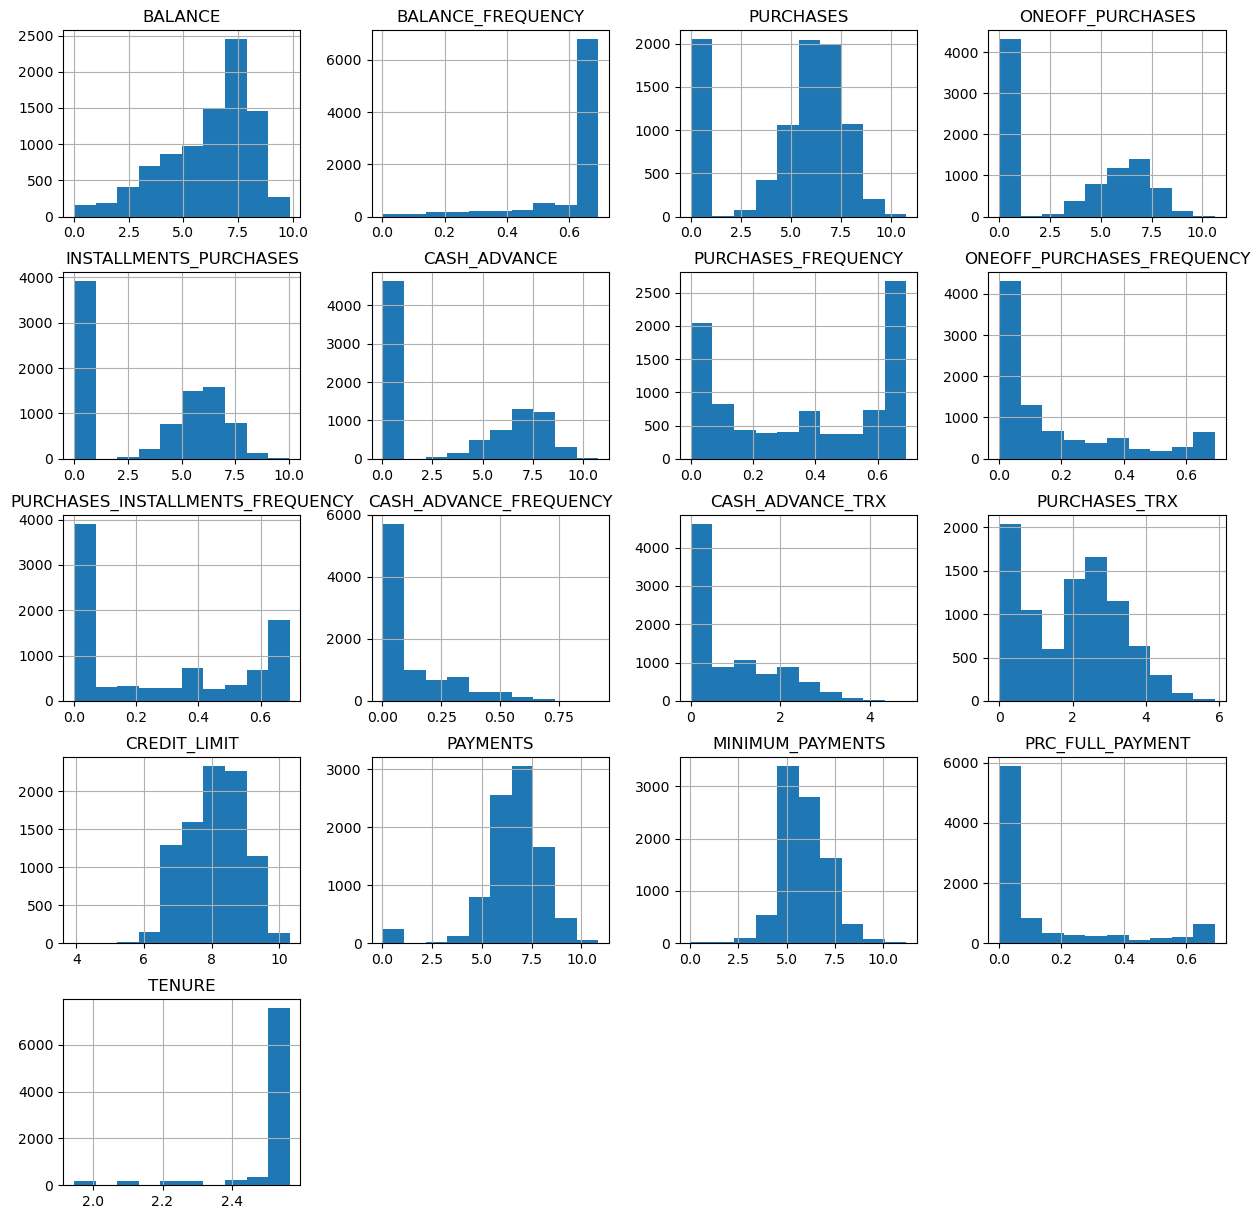

In [9]:
# normalizing data with log transformation
for col in df:
    df[col] = np.log(1 + df[col])

df.hist(bins=10, figsize=(15, 15))

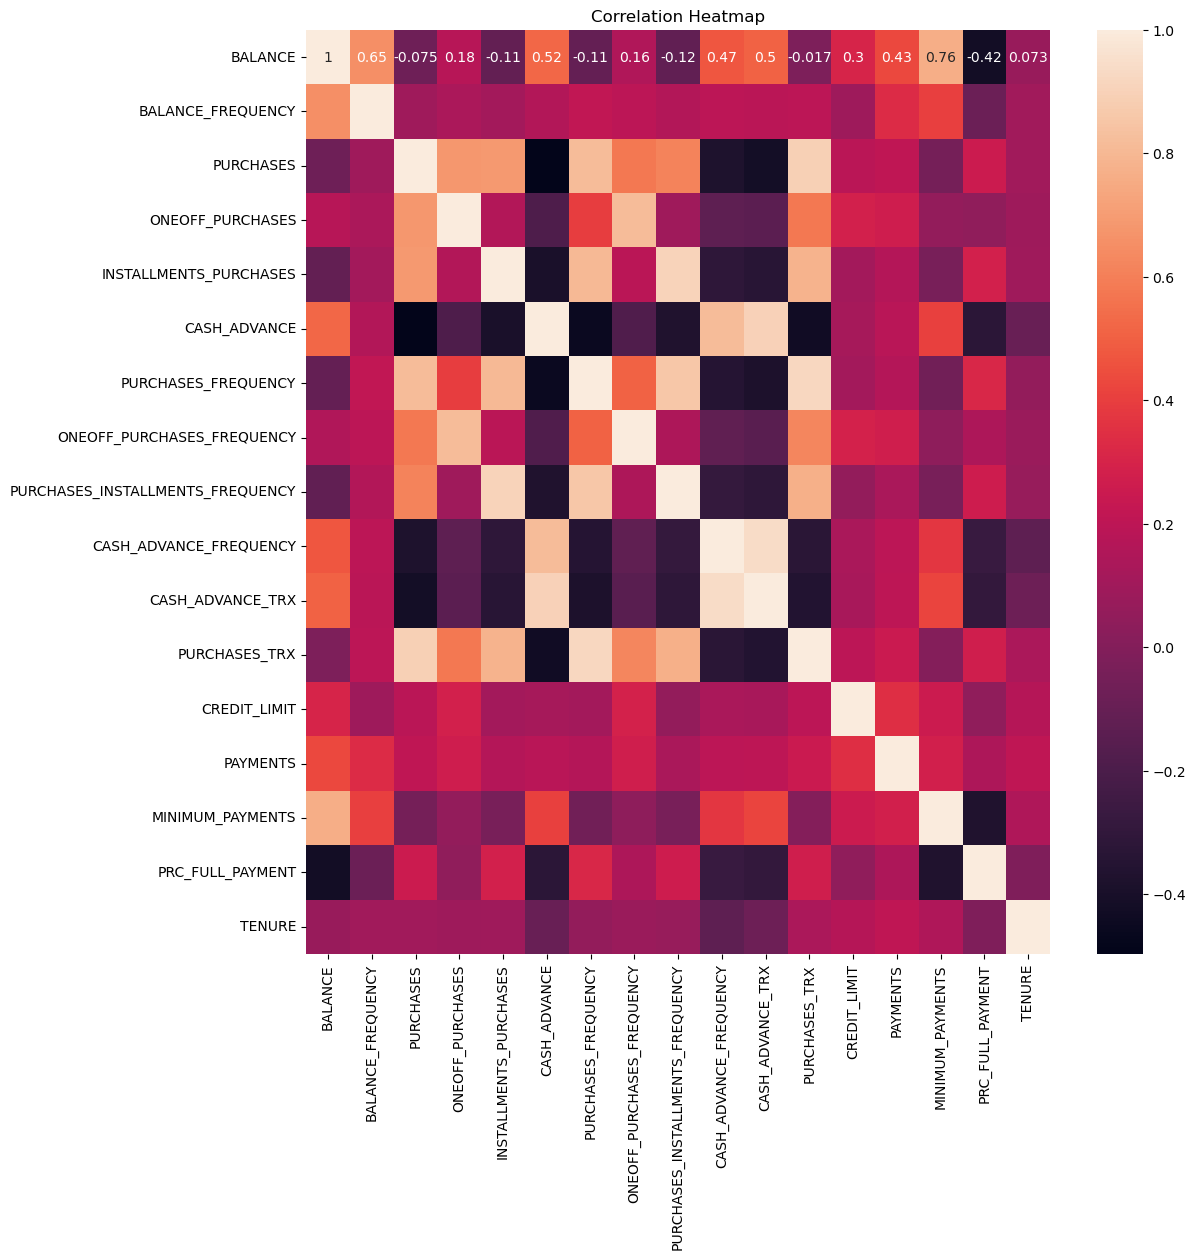

In [10]:
# analyzing correlation between features
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# drop feature with high correlation
df = df.drop(['PURCHASES_INSTALLMENTS_FREQUENCY'], axis=1)

In [12]:
# dimensionality reduction with PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df)

In [13]:
# determining number of clusters for k means
n_clusters = 10
inertia = []

for i in range(1, n_clusters):
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(X_pca)
    inertia.append(km.inertia_)

C:\Users\Stephen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Stephen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Stephen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Stephen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Stephen\anaconda3\Lib\site-packages\skl

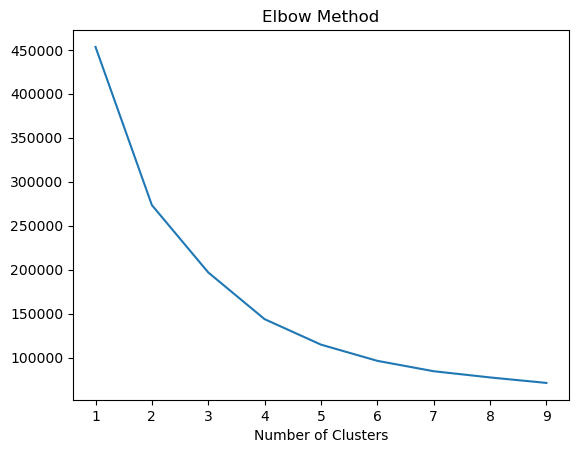

In [14]:
# plotting elbow method
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

In [15]:
# k means model
km = KMeans(n_clusters=5, random_state=23)
km.fit(X_pca)

df['kmclusters'] = km.labels_

silhouette_score(X_pca, km.labels_)

C:\Users\Stephen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.44845612356229

In [16]:
# dbscan model
dbscan = DBSCAN(eps=1.9, min_samples=17)
clusters = dbscan.fit_predict(X_pca)

df['dbclusters'] = clusters

silhouette_score(X_pca, clusters)

0.2934198438092596

In [17]:
# estimating dbscan bandwidth
bandwidth = estimate_bandwidth(X_pca, quantile=.06, n_samples=3000)

# mean shift model
ms = MeanShift(bandwidth=bandwidth)
clusters = ms.fit_predict(X_pca)

df['msclusters'] = clusters

silhouette_score(X_pca, clusters)

0.4447724384432934

In [18]:
# inverse transformation back to original distribution
for col in df:
    df[col] = np.exp(df[col])

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmclusters,dbclusters,msclusters
0,41.900749,1.818182,96.40,1.00,96.4,1.000000,1.166667,1.000000,1.000000,1.0,3.0,1001.0,202.802084,140.509787,1.000000,13.0,20.085537,1.000000,2.718282
1,3203.467416,1.909091,1.00,1.00,1.0,6443.945483,1.000000,1.000000,1.250000,5.0,1.0,7001.0,4104.032597,1073.340217,1.222222,13.0,54.598150,2.718282,1.000000
2,2496.148862,2.000000,774.17,774.17,1.0,1.000000,2.000000,2.000000,1.000000,1.0,13.0,7501.0,623.066742,628.284787,1.000000,13.0,1.000000,1.000000,20.085537
3,1667.670542,1.636364,1500.00,1500.00,1.0,206.788017,1.083333,1.083333,1.083333,2.0,2.0,7501.0,1.000000,313.452292,1.000000,13.0,1.000000,0.367879,22026.465795
4,818.714335,2.000000,17.00,17.00,1.0,1.000000,1.083333,1.083333,1.000000,1.0,2.0,1201.0,679.334763,245.791237,1.000000,13.0,1.000000,1.000000,20.085537


In [ ]:
# Visualizing k means model
plt.figure(figsize=(5,8))
sns.scatterplot(df, x='CREDIT_LIMIT', y='PURCHASES', hue='kmclusters', palette='Paired')
plt.show()

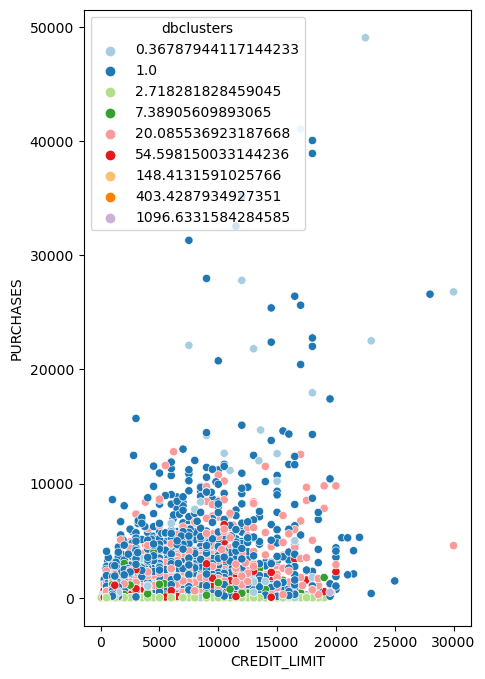

In [20]:
# visualizing dbscan model
plt.figure(figsize=(5,8))
sns.scatterplot(df, x='CREDIT_LIMIT', y='PURCHASES', hue='dbclusters', palette='Paired')
plt.show()

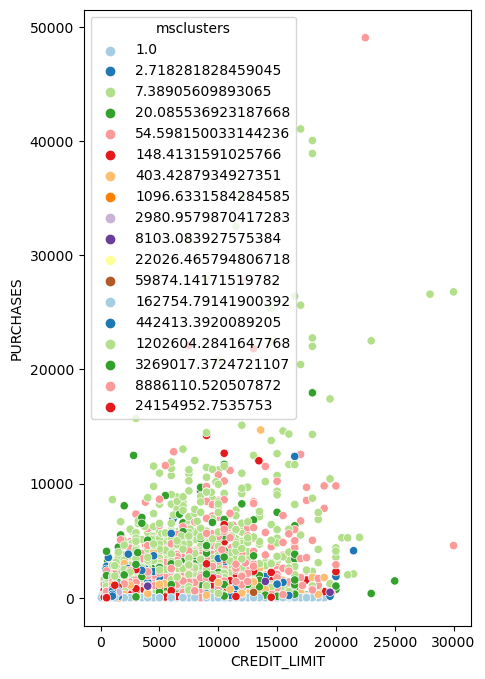

In [21]:
# visualizing mean shift model
plt.figure(figsize=(5,8))
sns.scatterplot(df, x='CREDIT_LIMIT', y='PURCHASES', hue='msclusters', palette='Paired')
plt.show()